In [794]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [795]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [796]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [797]:
df.shape

(768, 9)

In [798]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [799]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [800]:
insulin_q1=df['Insulin'].quantile(0.25)
insulin_q3=df['Insulin'].quantile(0.75)


In [801]:
iqr_insulin=insulin_q3-insulin_q1
iqr_insulin

127.25

In [802]:
lower_bound=insulin_q1-1.5*iqr_insulin
upper_bound=insulin_q3+1.5*iqr_insulin

In [803]:
new_df=df.loc[(df['Insulin']>lower_bound)&(df['Insulin']<upper_bound)]
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [804]:
df.shape

(768, 9)

In [805]:
new_df.shape

(734, 9)

In [806]:
new_df1=new_df['Outcome'].value_counts()
new_df1

Outcome
0    485
1    249
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x18ab770aff0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

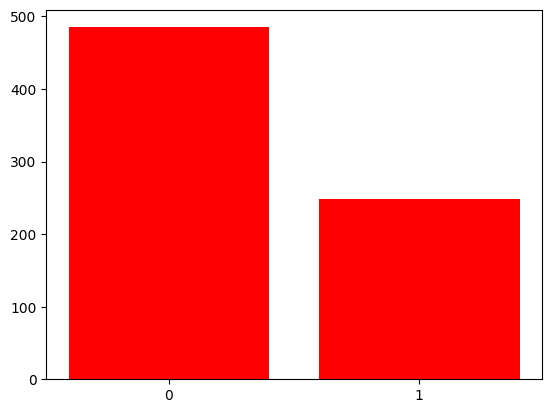

In [807]:
plt.bar(new_df1.index,new_df1.values,color='r')
plt.xticks([0,1])

In [808]:
df['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

This is moderately imbalanced, but not extremely (like 90–10 or 95–5).

In [809]:
x=new_df.drop(['Outcome'],axis=1)
y=new_df['Outcome']

In [810]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [811]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 734, dtype: int64

In [812]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

Feature Scaling

In [813]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [814]:
x_train

array([[-0.8592454 , -0.25839645,  0.56811631, ...,  0.35936722,
        -0.76790353, -0.77665842],
       [-0.8592454 , -0.38494288,  0.98806396, ..., -0.607027  ,
        -0.19338496, -0.77665842],
       [ 1.25849669,  2.33580528,  0.56811631, ..., -0.73253274,
         0.28067135,  2.9045423 ],
       ...,
       [ 0.04835835, -1.11258483, -0.58673972, ..., -0.51917298,
        -0.48849286, -0.43422115],
       [ 0.04835835,  2.01943921,  0.4631294 , ...,  0.63547986,
        -0.62034958, -0.17739319],
       [ 2.16610044,  0.5008821 ,  0.77809013, ..., -0.4564201 ,
        -0.63290737,  0.76430932]])

In [815]:
x_test

array([[-1.16177998,  0.15287943, -0.06180516, ..., -0.90824078,
        -0.80243744, -1.03348638],
       [-0.8592454 , -0.73294555,  0.04318175, ..., -1.7240281 ,
        -0.98766474, -1.03348638],
       [-1.16177998, -1.4605875 , -0.90170046, ..., -0.51917298,
        -0.60465236, -0.94787706],
       ...,
       [-0.8592454 ,  0.24778925,  1.51299852, ...,  0.00795114,
         2.69804457, -0.00617455],
       [ 0.04835835, -0.10021342, -0.3767659 , ..., -0.28071206,
        -0.25617388, -0.26300251],
       [-0.55671081,  0.27942586,  0.77809013, ..., -0.49407183,
        -0.55756067, -0.51983047]])

In [816]:
x_train.shape

(513, 8)

In [817]:
x_test.shape

(221, 8)

In [818]:
y_train.value_counts(normalize=True)*100

Outcome
0    66.081871
1    33.918129
Name: proportion, dtype: float64

In [819]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
cross_val_score

array([0.71428571, 0.61904762, 0.67346939, 0.7755102 , 0.62328767])

In [820]:
cross_val_score.mean()

0.681120119280589

In [821]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,
        oob_score=True,
        random_state=0
)
bag_model.fit(x_train,y_train)
bag_model.oob_score_

0.7524366471734892

In [822]:
bag_model.score(x_test,y_test)

0.7782805429864253

In [823]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
bag_model=BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,
        oob_score=True,
        random_state=0
)

cross_val=cross_val_score(bag_model,x,y,cv=5)
cross_val.mean()

0.7506662939148262